### Oja's PCA（Principal Component Analysis）学习算法

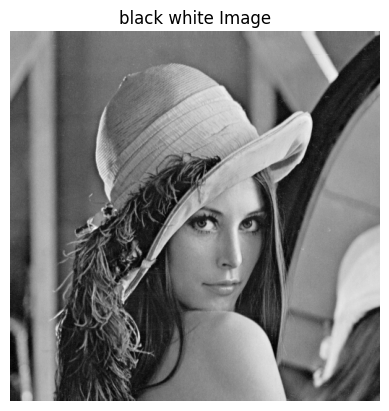

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# 打开图像文件
image = Image.open('Lenna.png') 

# 将图像转换为黑白图像
bw_image = image.convert('L')
plt.imshow(bw_image, cmap='gray')
plt.title('black white Image')
plt.axis('off')
plt.show()


In [2]:
# 分块变成64*4096
block_size = 8
width, height = bw_image.size
blocks = []

# 裁剪8*8
for y in range(0, height, block_size):
    for x in range(0, width, block_size):
        block = bw_image.crop((x, y, x + block_size, y + block_size))
        blocks.append(block)

# block变成ndarray并展平，最后整个列表变成np数组
block_vectors = [np.array(block).flatten() for block in blocks]
# 64 * 4096
X_original = np.array(block_vectors).T

In [3]:
X_original

array([[162, 165, 157, ...,  84,  52,  57],
       [162, 161, 156, ...,  82,  49,  51],
       [162, 162, 161, ...,  75,  52,  61],
       ...,
       [159, 153, 153, ...,  41,  72, 104],
       [156, 153, 152, ...,  42,  76, 105],
       [157, 151, 152, ...,  50,  83, 108]], dtype=uint8)

In [30]:
# 设计模型
num_features = 64

class Oja_PCA:
    
    def __init__(self, X, components) -> None:
        
        self.X = X
        self.w = np.random.rand(num_features ,components)
    
    def __call__(self,epoches=50, lr = 1e-8):
        self.train(epoches, lr)
        return self.ShowImg()
    
    
    def ShowImg(self,):
        # 解压
        y = self.w.T @ self.X
        X_compress = (self.w @ y).T
        Img_blocks = []
        Img_arrays = np.zeros((width,height))

        # 复原
        for x in X_compress:
            block = x.reshape((block_size,block_size))
            Img_blocks.append(block)
        idx = 0
        for x in range(0, height, block_size):
            for y in range(0, width, block_size):
                Img_arrays[x:x+block_size,y:y+block_size] = Img_blocks[idx]
                idx += 1
        
        # show
        image = Image.fromarray(Img_arrays) 
        plt.imshow(image)
        plt.axis('off')
        plt.show()
    
    def train(self, epoches, lr):
        
        for epoch in range(epoches):
            for col in range(4096):
                x = self.X[:, col].reshape(-1,1)
                w_old = self.w
                y = w_old.T @ x
                w_new = w_old + lr *  ((x - w_old @ y) @ y.T)
                self.w = w_new
                print(x)
            #print(f"{epoch+1} epoches")
            print(f"the norm of w : {np.linalg.norm(self.w, ord=2)}")
        
        # 范数处理
        self.w = self.w/np.linalg.norm(self.w, axis=0) 

the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.0000341081328346
the norm of w : 1.00

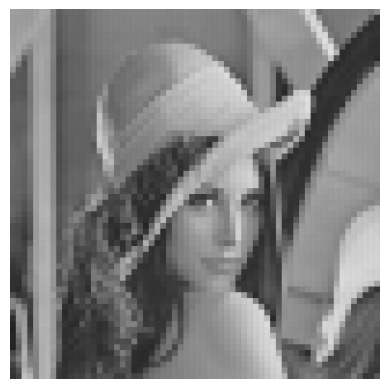

In [15]:
# 1个主成分
model_1 = Oja_PCA(X_original, 1)
model_1()

In [29]:
# 4个主成分
model_2 = Oja_PCA(X_original, 4)
model_2()

0.3260212429403714
0.32636903064233713
0.3266937331423304
0.32699499433380724
0.32731262897206675
0.3276847963585424
0.3280986213528403
0.3283927396813213
0.32851739398663427
0.32864787179857297
0.3287986960980051
0.32894881835665385
0.3291064146303176
0.3292638466124965
0.32944540913220205
0.3296512145634952
0.3298833775849956
0.3301317967981198
0.33035719899308646
0.3305839316522581
0.33083103221387195
0.33108491762904063
0.3313313305137572
0.3315721660121995
0.3318274749087461
0.33208633056431497
0.33235483927267084
0.33260005599281667
0.3328501717604849
0.3330951223730298
0.33335731770648336
0.33360594685564365
0.33386874267503375
0.33411068776631064
0.33434552146731733
0.3345930253376408
0.33482483612892366
0.33506287593813416
0.3352812647819125
0.3354673975253576
0.33562918167175504
0.3359138747554879
0.3362688545936933
0.3365852007135689
0.33692214380741403
0.3372734795278046
0.3376101401173921
0.33797379518761234
0.33832703364508077
0.3386825505407575
0.339054789570238
0.339699

0.3286984410188037
0.32871978264825297
0.3287061795445104
0.3287212448994175
0.3287327235509554
0.32874900527935774
0.32875871355768066
0.32875890092712967
0.32874357320288844
0.32875515535213407
0.3287326962695996
0.3287169774775863
0.3287107465081814
0.3287222199838656
0.3287113131985388
0.3286947269558206
0.3286897496083432
0.32867675680793035
0.32865333821904125
0.32862993875020724
0.3286436426011785
0.32864315841846015
0.328651259729739
0.32864215161638416
0.32885229595846477
0.32887098359951533
0.3288931871330344
0.3288933154904554
0.32888297854229787
0.3288789458343789
0.32886060465799366
0.328887457609157
0.3287341906155001
0.32879978510842583
0.3288023604142094
0.3288128351636056
0.32881062691994
0.32883851764775757
0.32882715838345655
0.32880649253447086
0.3288087732222941
0.32880330463011587
0.32881885780727504
0.32880759578198165
0.3288242727926492
0.32885837818323366
0.32884414582231736
0.32883342557194106
0.32882521881828763
0.3288243344473573
0.3288062166704009
0.3288196

0.3034312276692698
0.30341088550179857
0.30337986006132606
0.3033890087482828
0.3033464137819621
0.3034494402762272
0.30339664727575566
0.3033010976808756
0.3035413857380658
0.3034217175441313
0.3034296048986915
0.3033492563548904
0.3034765587652649
0.30350552929056657
0.3034683302972147
0.3034849380253704
0.30351209818658204
0.3032958739300086
0.3036127599669139
0.30368542283699834
0.30366740619309013
0.30364826624981817
0.30369947710975814
0.3036939435973067
0.30368429479506476
0.3036716064686356
0.30367489513541374
0.30360833730345016
0.30361561321887953
0.3036557934158377
0.3036600510510065
0.30364260004045873
0.3036492222082867
0.30366965574399285
0.3036443475200805
0.3036352514319726
0.30362813695023383
0.30361008644877713
0.30360890906876403
0.3036068675139013
0.3035784161419708
0.30359670590352306
0.30359445742947583
0.3035857975073854
0.30357885725470407
0.3035860084096977
0.3035944500428138
0.30363850802934056
0.303627006895478
0.303628946466017
0.3036270963518473
0.303616276

0.284269967669213
0.28416494890047783
0.2842108934645066
0.2842211651817186
0.2842114015513647
0.28421328717155614
0.284218287693421
0.28452049067693863
0.2846194308079567
0.28463056450958973
0.284630965875159
0.28462559028168527
0.2846086915573028
0.28444582575915034
0.2844828825417549
0.2844810598298685
0.2844674522916439
0.28448286996792976
0.2844892458682771
0.28450555378711356
0.2844886093695363
0.284496279393447
0.28448598150695614
0.28447085828166285
0.284461793504445
0.2844701337336696
0.284508460438828
0.28453584231653334
0.2845483003555109
0.2845373301408544
0.284541033486108
0.2845348404125553
0.2845328786981008
0.2845440813441264
0.284483532943506
0.28444138490004073
0.284404669235591
0.28434717368070817
0.2843022365127182
0.2843256943316482
0.28431215278665617
0.28421288856313515
0.2842912373597682
0.284292389163116
0.2842573848226283
0.28422870536793254
0.28412491487997943
0.28415329021451985
0.2842232997980923
0.28426170678634033
0.2842833571192712
0.2843068759789581
0.2

0.2715898894112347
0.271601076926935
0.271617324848492
0.27161785421462287
0.27163094181239883
0.27163072308636305
0.2716298447465823
0.27162969175333757
0.27163112997825595
0.2716478859913566
0.2716385139553533
0.2716405781562313
0.27164365322667094
0.2716442066131495
0.2716341056323197
0.2716273916136076
0.27162929999052543
0.27161658082713935
0.27161575676043825
0.27161870558309203
0.2716209404958832
0.27164811841053343
0.2716594327320803
0.2716601507579019
0.2716867157823425
0.271698708976158
0.271779541422399
0.2717765097674114
0.27177898136528394
0.2717925349443743
0.27179465563869465
0.2717819338017342
0.2717596213344385
0.2717613196498726
0.2717692160850372
0.2717632496821009
0.2717470762932464
0.2718722167432879
0.2718587647630949
0.2718703939011201
0.2718580362862593
0.27188210399001933
0.2718859706978044
0.2718849221231468
0.2719258057516174
0.2719420164425052
0.2719426884150245
0.2719296045701688
0.27193372004734456
0.2719161840767633
0.27189318789521444
0.271893882011957
0

0.26123393435574443
0.26125010956493366
0.26126936325071454
0.2612666671836628
0.2612634957843486
0.2613010248611186
0.2613487040250067
0.26135374958649527
0.26137765106571603
0.2614068726099302
0.26119418709363923
0.2612193656114671
0.2612184126716386
0.2611927771085319
0.26117660192021125
0.26117448527462916
0.26118974002156
0.26121960426769397
0.2612472118435304
0.26126778897473363
0.26123624316470545
0.2612307312966442
0.26115604767414147
0.26107268508639875
0.26109820688106017
0.26122703540126424
0.26126936447076204
0.26123539776496585
0.2612301676839181
0.261214850420749
0.2612258038594758
0.26124510521598027
0.26128078417441813
0.26131366190266836
0.26128171393812727
0.2612688747371602
0.2612858872418672
0.26130092698951296
0.2613041404952997
0.2614698660744331
0.2614738771732547
0.26147698227977734
0.26147730156324145
0.2614457257204928
0.2612751494615739
0.2612412740108058
0.261180516739127
0.2612569247984691
0.2612639912838035
0.2613025200633482
0.2614362428237272
0.261507634

0.24909478286372974
0.24912649848190271
0.2491295667177975
0.2491773032808798
0.24917983662815715
0.24916631756603175
0.2492044598757046
0.2493788523342715
0.24932787815513544
0.2492478624898758
0.2492993763156205
0.2492795364679484
0.2492571396041874
0.24925426643909349
0.24924332382996459
0.2492107533867441
0.2492563166262806
0.24924189932336474
0.2491991172821617
0.24917771513896497
0.24917871954249712
0.2491923804303125
0.24917398928850282
0.24918059959259795
0.24917039307172212
0.24918680373657323
0.24917238804108538
0.24918260846703497
0.24918410343335187
0.24917616222733427
0.24916745931571574
0.24916893466992762
0.2491757365753872
0.2491689097463725
0.2491490782463869
0.2489084061511496
0.24888847000769995
0.248879416473294
0.24888741028381833
0.24893261195575048
0.24900953327326125
0.24902995111772014
0.2490736417742007
0.24903152323786396
0.2490740693285972
0.24920152303553678
0.2492301521082453
0.24919236005150244
0.24920916574671487
0.24921918226232664
0.24920735686071976
0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

